# Dash App

The purpose of this notebook is to generate the map that includes physical boundaries and probability of a debris flow

In [24]:
import geopandas as gpd
import numpy as np
from dash import Dash, html, dcc, Input, Output

In [25]:
import plotly.express as px
# import plotly
# plotly.io.templates.default = 'plotly_dark'

In [26]:
# %pip install "jupyterlab>=3" "ipywidgets>=7.6"

In [27]:
# %pip install jupyter-dash==0.4.2

In [28]:
from jupyter_dash import JupyterDash

In [29]:
# !jupyter lab

In [30]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.22.0
ipywidgets       : 8.0.6
jupyter_client   : 7.3.4
jupyter_core     : 5.3.0
jupyter_server   : 1.23.6
jupyterlab       : 3.6.3
nbclient         : 0.7.3
nbconvert        : 7.3.0
nbformat         : 5.8.0
notebook         : 6.5.3
qtconsole        : not installed
traitlets        : 5.9.0


In [23]:
# !jupyter labextension install jupyterlab-plotly

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
Building jupyterlab assets (production, minimized)


In [31]:
# definitely has geometry
cols = [
    'SiteID', # will need to join on this
    #'geom', # don't necessarily need this, but it's the location of past DFs
    'geometry'
] 

dz = gpd.read_parquet("../../data/staley16_observations_catchment_fuelpars_v3.parquet", columns=cols)
dz = dz.drop_duplicates()
dz

SiteID                                           geometry
0          0  POLYGON ((-118.43109 34.54266, -118.43099 34.5...
1          1  POLYGON ((-118.44860 34.55066, -118.44849 34.5...
2          2  POLYGON ((-118.40682 34.58162, -118.40672 34.5...
3          3  POLYGON ((-118.40468 34.55862, -118.40458 34.5...
4          4  POLYGON ((-118.40804 34.55505, -118.40798 34.5...
...      ...                                                ...
1530     711  POLYGON ((-109.27976 33.67995, -109.27966 33.6...
1534     712  POLYGON ((-109.26973 33.67408, -109.26962 33.6...
1538     713  POLYGON ((-109.26211 33.67661, -109.26206 33.6...
1542     714  POLYGON ((-109.26120 33.65589, -109.26115 33.6...
1546     715  POLYGON ((-109.27347 33.66086, -109.27337 33.6...

[716 rows x 2 columns]

In [32]:
# # one geometry for every siteid
# dz.groupby(['SiteID'])['geometry'].nunique().value_counts()

In [33]:
# # about a third of the sites only have one record
# # the remainder have 2+
# dz['SiteID'].value_counts().value_counts()

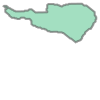

In [34]:
dz['geometry'][0]

In [35]:
# replace this with whatever our final feature file is
file = "../../data/staley16_observations_catchment_fuelpars_rocktype_randn_lndslide_fireinterval_v6.parquet"


df = modelDataI=gpd.read_parquet(file)
print('raw data -',df.shape)

df=df.dropna()
print('after nulls removed -',df.shape)

df.head()

raw data - (1379, 49)
after nulls removed - (1078, 49)


fire_name  year fire_id fire_segid  database state  response  stormdate  \
0  Buckweed  2007     bck   bck_1035  Training    CA         0         22   
1  Buckweed  2007     bck   bck_1090  Training    CA         0         22   
2  Buckweed  2007     bck   bck_1570  Training    CA         0         22   
3  Buckweed  2007     bck    bck_235  Training    CA         0         22   
4  Buckweed  2007     bck    bck_363  Training    CA         0         22   

   gaugedist_m          stormstart  ... Igneous  Metamorphic  Sedimentary  \
0      1998.67 2008-01-21 16:27:00  ...     0.0     1.000000     0.000000   
1      2368.93 2008-01-21 16:27:00  ...     0.0     1.000000     0.000000   
2      3956.74 2008-01-21 16:27:00  ...     0.0     0.973247     0.026753   
3      1734.72 2008-01-21 15:47:00  ...     0.0     1.000000     0.000000   
4      1801.04 2008-01-21 15:47:00  ...     0.0     1.000000     0.000000   

   Unconsolidated        domrt  index_right     LNDS_RISKV  LNDS_RISKS  \
0             0.0  Metamorphic          205  380675.353544   96.305814   
1             0.0  Metamorphic          205  380675.353544   96.305814   
2             0.0  Metamorphic          205  380675.353544   96.305814   
3             0.0  Metamorphic          205  380675.353544   96.305814   
4             0.0  Metamorphic          205  380675.353544   96.305814   

        LNDS_RISKR  fire_interval  
0  Relatively High            1.0  
1  Relatively High            1.0  
2  Relatively High            1.0  
3  Relatively High            1.0  
4  Relatively High            1.0  

[5 rows x 49 columns]

In [36]:
# merge the geoemtry data to our full dataframe
# retains GPD container type

'''
why is this exploding the number of rows?
'''
df = df.merge(dz, how='left', left_on='SiteID', right_on='SiteID', copy=False)
df.shape

(1078, 50)

In [37]:
# bring in a random probability for testing
probas = np.random.uniform(low=0, high=1, size=df.shape[0])

df['proba'] = probas

In [39]:
# for exploratory purposes
# not sure all of these are needed
plot_cols = [
    'SiteID', # will ultimately be needed for joining
    'lat',
    'lon',
    'geom',
    'geometry',
    'proba'
]

df = df[plot_cols]
df

SiteID        lat         lon                         geom  \
0          0  34.542358 -118.437076  POINT (-118.43708 34.54236)   
1          1  34.540093 -118.439898  POINT (-118.43990 34.54009)   
2          2  34.528844 -118.443708  POINT (-118.44371 34.52884)   
3          3  34.558602 -118.404930  POINT (-118.40493 34.55860)   
4          4  34.554817 -118.408627  POINT (-118.40863 34.55482)   
...      ...        ...         ...                          ...   
1073     711  33.674955 -109.270364  POINT (-109.27036 33.67496)   
1074     712  33.674044 -109.269682  POINT (-109.26968 33.67404)   
1075     713  33.676641 -109.261972  POINT (-109.26197 33.67664)   
1076     714  33.654978 -109.266936  POINT (-109.26694 33.65498)   
1077     715  33.653975 -109.272564  POINT (-109.27256 33.65397)   

                                               geometry     proba  
0     POLYGON ((-118.43109 34.54266, -118.43099 34.5...  0.501201  
1     POLYGON ((-118.44860 34.55066, -118.44849 34.5...  0.657871  
2     POLYGON ((-118.40682 34.58162, -118.40672 34.5...  0.862367  
3     POLYGON ((-118.40468 34.55862, -118.40458 34.5...  0.288350  
4     POLYGON ((-118.40804 34.55505, -118.40798 34.5...  0.308223  
...                                                 ...       ...  
1073  POLYGON ((-109.27976 33.67995, -109.27966 33.6...  0.522799  
1074  POLYGON ((-109.26973 33.67408, -109.26962 33.6...  0.918709  
1075  POLYGON ((-109.26211 33.67661, -109.26206 33.6...  0.744092  
1076  POLYGON ((-109.26120 33.65589, -109.26115 33.6...  0.557809  
1077  POLYGON ((-109.27347 33.66086, -109.27337 33.6...  0.023696  

[1078 rows x 6 columns]

## Plotly Choropleth

first build the figure that dash will deploy

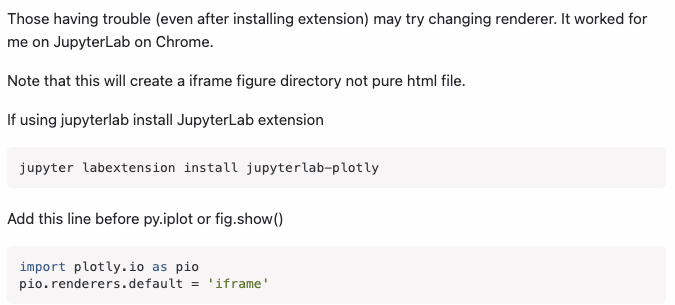

In [46]:
# calculate center of map for initializing  to our data
map_center = {
    "lon": df['geometry'].centroid.x.median(),
    "lat": df['geometry'].centroid.y.median(),
}

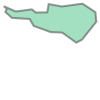

In [43]:
# first need to simplify the shapely geometry
# how to simplify
tol = 0.00025
df.loc[0,"geometry"].simplify(tol)

In [48]:
%%time
tol=0.00025
df['geometry_simple'] = df['geometry'].map(lambda x: x.simplify(tol))

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# might need to convert shape coordnates
#df.to_crs('epsg:4326')

In [52]:
help(px.choropleth_mapbox)

Help on function choropleth_mapbox in module plotly.express._chart_types:

choropleth_mapbox(data_frame=None, geojson=None, featureidkey=None, locations=None, color=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, zoom=8, center=None, mapbox_style=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a Mapbox choropleth map, each row of `data_frame` is represented by a
        colored region on a Mapbox map.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword
        names) to be used. Array-like and dict are transformed internally to a
        pandas DataFrame. Optional: if missing, a DataFrame 

In [68]:
# help(px.colors.sequential)
#https://plotly.com/python/builtin-colorscales/

In [70]:
fig = px.choropleth_mapbox(
    df,
    df['geometry_simple'],
    locations=df['SiteID'],
    color='proba',
    #color_continuous_scale='OrRd',
    #color_continuous_scale='RdBu_r',
    color_continuous_scale='Blackbody_r',
    hover_data=['SiteID'],
    center=map_center,
    mapbox_style='stamen-terrain',
    height=800,
    zoom=7,
    opacity=0.5 
)

# doesn't open in jupyterlab
# need to download and open to test
fig.write_html("test_plot.html")

# not displaying
fig.show()

## Build Dash app

https://plotly.com/python/getting-started/#jupyterlab-support-python-35
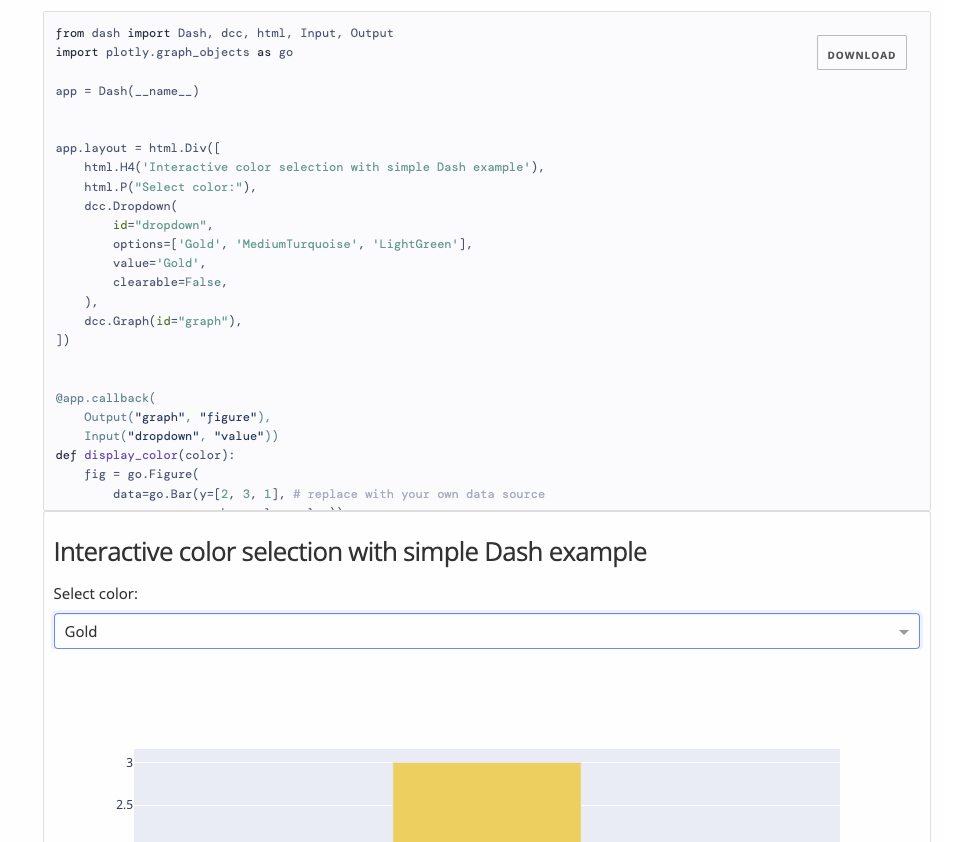

# example of map created in prep notebook 03

simplified geometry for plotting?
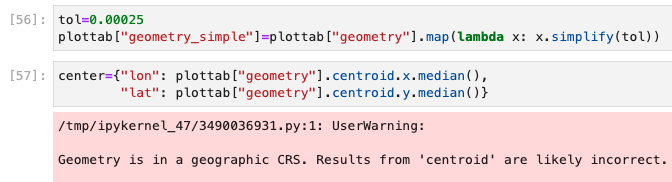

- `mapbox_style="stamen-terrain"`
```python
fig1=px.choropleth_mapbox(plottab, plottab["geometry_simple"],
                     locations=plottab.index,
                     color="Dominant Rock Type",
                     #color="snapdist",
                     hover_data=["Igneous","Metamorphic","Sedimentary","Unconsolidated"],
                     center=center,
                     mapbox_style="stamen-terrain",
                     height=800,
                     zoom=4,
                     opacity=0.5)

fig2=px.scatter_mapbox(plottab.reset_index(), lon="lon", lat="lat", color="Legend", 
                      color_discrete_map={"DF Site": "orange"},
                      size="size", size_max=5,
                      hover_data=["SiteID", "contributingarea_km2", "newarea","snapdist"])

fig1.add_traces(fig2.data)

fig1
```

In [29]:
app = Dash(__name__) #if wanted to build in python ide
#app = JupyterDash(__name__) # might switch to this for dev in notebook


### configure visualization

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}



### Send to Server

app.layout = html.Div(
    style={'backgroundColor': colors['background']},
    children=[
        # header1
        html.H1(
        children="Debris Flow Probability",
        style={
            'textAlign': 'center',
            'color': colors['text'],
        }
    ),
        
        # map plot
        html.Div([
            dff.Graph(
                id='my_map',
                style={
                    'position': 'absolute'
                }
                     )
        ])
        
        
              
])

In [30]:
# # when app is ready, run it!
# if __name__=='__main__':
#     #app.run(debug=True)
#     app.run_server(
#         #mode='<MODE>', # fill this in
#         mode='jupyterlab',
#         host='localhost', # will eventually be web hosted
#         port=8051, # will likely change
#         debug=True, # change to False on deploy
#         dev_tools_hot_reload=True # changes to dev occur in app in real time
#     )